# **Final Report - Data Science**
## Bachelor's Degree in Computer Science / PUCPR

**Prof. Jean Paul Barddal** / **Prof. Rayson Laroca**

`Arthur Przygocki` - `arthurprzygocki170403@gmail.com`

`Carlos Eduardo Rodrigues Mello` - `carlosrmelloo@gmail.com`

`Gabriel Yuichi Suzaki` - `yuichigabriel0@gmail.com`

`Henrique Tetilha Golias` - `henriquetetilha@gmail.com`

`Maria Julia Prado Lazaroto` - `mariajulialazaroto@gmail.com`

`2025`

# **Import the libs you need**

In [2]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\henri\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Load your data**

Below, load the data using pandas and perform all necessary data cleansing to ensure that the data types are correct for further analysis.

In [3]:
file_path = "universal_top_spotify_songs.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "asaniczka/top-spotify-songs-in-73-countries-daily-updated",
  file_path,
)

C:\Users\henri\AppData\Local\Temp\ipykernel_24384\1735426109.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 433M/433M [00:31<00:00, 14.3MB/s] 


In [4]:
# clean and treat the data here
df['country']=df['country'].fillna('Global')
df.dropna(inplace=True)

df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

In [59]:
df


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,snapshot_year_month,snapshot_year
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,Global,2025-04-11,89,False,...,0,0.0317,0.2890,0.000000,0.126,0.498,157.964,3,2025-04,2025
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,0,Global,2025-04-11,99,False,...,1,0.0358,0.2000,0.060800,0.117,0.438,104.978,4,2025-04,2025
2,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,3,0,0,Global,2025-04-11,84,False,...,1,0.0600,0.7040,0.000007,0.055,0.391,168.115,3,2025-04,2025
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,0,0,Global,2025-04-11,92,False,...,0,0.2600,0.0283,0.000000,0.355,0.939,149.027,4,2025-04,2025
4,2CGNAOSuO1MEFCbBRgUzjd,luther,"Kendrick Lamar, SZA",5,0,0,Global,2025-04-11,94,False,...,1,0.1250,0.2510,0.000000,0.248,0.576,138.008,4,2025-04,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919452,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out,"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3,2023-10,2023
1919453,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE,"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4,2023-10,2023
1919454,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5,2023-10,2023
1919455,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4,2023-10,2023


In [20]:
def interpretar_distribuicao(skewness, kurtosis):
    print("\nDistribuição:")

    # Interpretando a Assimetria
    if abs(skewness) < 0.1:
        print(" A distribuição é aproximadamente simétrica.")
    elif skewness > 0:
        print(" A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.")
    else:
        print(" A distribuição possui assimetria negativa: a média é menor que a mediana e a moda. A cauda da esquerda é mais longa.")

    # Interpretando a Curtose
    if abs(kurtosis) < 0.5:
        print(" A curtose é próxima de zero: distribuição mesocúrtica, semelhante à normal.")
    elif kurtosis > 0:
        print(" A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.")
    else:
        print(" A distribuição é platicúrtica: tem caudas mais leves e topo mais achatado que a normal.")

# **Statistical Description**

In this section, you should report the key characteristics of the dataset, including but not limited to:
* Number of instances;
* Number of features;
* Number of classes;
* Class distribution.

### **Number of Instances**:

In [5]:
row_count = len(df)
print(f"Number of instances: {row_count}")

Number of instances: 1918635


### **25 Features**:

**spotify_id**: The unique identifier for the song in the Spotify database. `(str)`

**name**: The title of the song. `(str)`

**artists**: The name(s) of the artist(s) associated with the song. `(str)`

**daily_rank**: The daily rank of the song in the top 50 list. `(int)`

**daily_movement**: The change in rankings compared to the previous day. `(int)`

**weekly_movement**: The change in rankings compared to the previous week. `(int)`

**country**: The ISO code of the country of the Top 50 Playlist. If Null, then the playlist if 'Global Top 50'. `(str)`

**snapshot_date**: The date on which the data was collected from the Spotify. `(str)`

**popularity**: A measure of the song's current popularity on Spotify. `(int)`

**is_explicit**: Indicates whether the song contains explicit lyrics. `(bool)`

**duration_ms**: The duration of the song in milliseconds. `(int)`

**album_name**: The title of the album the song belongs to. `(str)`

**album_release_date**: The release date of the album the song belongs to. `(str)`

**danceability**: A measure of how suitable the song is for dancing based on various musical elements. `(float)`

**energy**: A measure of the intensity and activity level of the song. `(float)`

**key**: The key of the song. `(int)`

**loudness**: The overall loudness of the song in decibels. `(float)`

**mode**: Indicates whether the song is in a major or minor key. `(int)`

**speechiness**: A measure of the presence of spoken words in the song. `(float)`

**acousticness**: A measure of the acoustic quality of the song. `(float)`

**instrumentalness**: A measure of the likelihood that the song does not contain vocals. `(float)`

**liveness**: A measure of the presence of a live audience in the recording. `(float)`

**valence**: A measure of the musical positiveness conveyed by the song. `(float)`

**tempo**: The tempo of the song in beats per minute. `(float)`

**time_signature**: The estimated overall time signature of the song. `(int)`

### Number of Classes

In [6]:
unique_values = df.nunique()
unique_values

spotify_id            22481
name                  19700
artists               12574
daily_rank               50
daily_movement           99
weekly_movement          99
country                  73
snapshot_date           530
popularity              101
is_explicit               2
duration_ms           16869
album_name            14915
album_release_date     2791
danceability            797
energy                  951
key                      12
loudness               8982
mode                      2
speechiness            1281
acousticness           2689
instrumentalness       3976
liveness               1451
valence                1167
tempo                 15170
time_signature            5
dtype: int64

### Class Distribution

In [7]:
# Contar as ocorrências de valores únicos para cada coluna
unique_value_counts = {col: df[col].value_counts() for col in df.columns}

# Exemplo: Exibir os valores únicos e suas contagens para a coluna 'country'
print(unique_value_counts['country'])

country
DO    26525
IT    26520
NI    26519
PL    26514
CZ    26511
      ...  
VN    25756
UY    25752
LU    25677
VE    25612
GB    20837
Name: count, Length: 73, dtype: int64


# **Univariate data analysis**

In this section, you should perform univariate data analysis on at least **20 variables**.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (Gaussian, binomial, exponential, etc.);
2. Skewness;
3. Kurtosis;
4. Mean, standard deviation, and what they stand for in the context of the dataset.

Ensure that each variable is **plotted correctly** based on its type. For instance, make sure scatterplots are not used for categorical data and so forth.

Distribuição de músicas com e sem vocais:
Categoria       | Quantidade
-----------------------------
Com vocais      | 1891342
Instrumental    | 30943


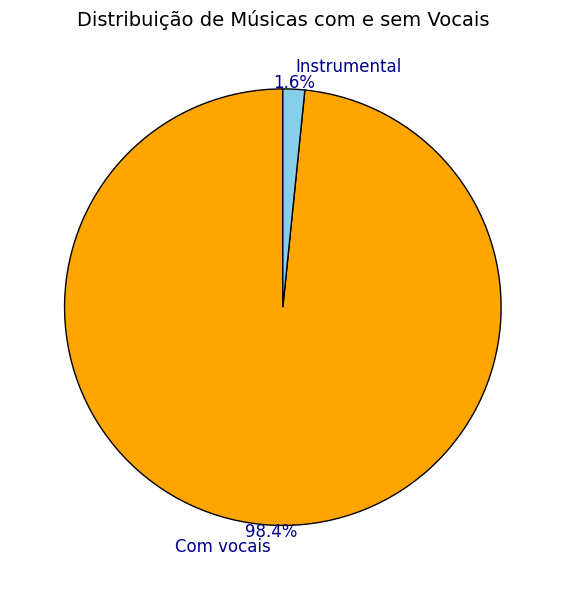


 Estatísticas da variável 'instrumentalness':

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 0.0221
Desvio Padrão: 0.1102
Assimetria (Skewness): 6.46
Curtose: 44.20


In [73]:
# 1. Classificar músicas com ou sem vocais
df['vocals'] = df['instrumentalness'].apply(lambda x: 'Instrumental' if x > 0.5 else 'Com vocais')

# 2. Contar categorias
vocals_count = df['vocals'].value_counts()
print("Distribuição de músicas com e sem vocais:")
print("Categoria       | Quantidade")
print("-----------------------------")
for tipo, qtd in vocals_count.items():
    print(f"{tipo:<15} | {qtd}")

# Contagem das categorias (já criada anteriormente)
vocals_count = df['vocals'].value_counts()

# Cores customizadas
colors = ['orange', 'skyblue']

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(vocals_count, labels=vocals_count.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12, 'color': 'darkblue'},
        wedgeprops={'edgecolor': 'black'}, pctdistance=1.03)

plt.title('Distribuição de Músicas com e sem Vocais', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Estatísticas da variável contínua 'instrumentalness'
instr = df['instrumentalness']
mean = instr.mean()
std = instr.std()
skewness = instr.skew()
kurtosis = instr.kurt()

print("\n Estatísticas da variável 'instrumentalness':")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.4f}")
print(f"Desvio Padrão: {std:.4f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

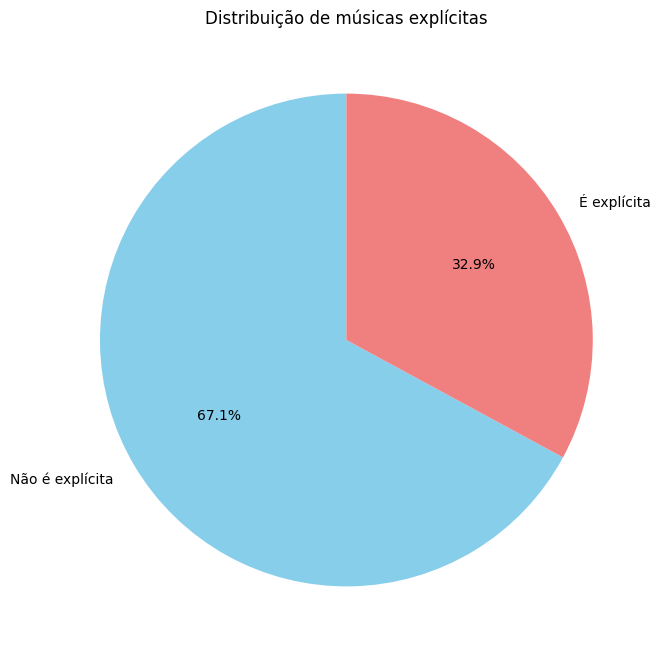

In [ ]:
# Contar os valores da coluna 'is_explicit'
explicit_counts = df['is_explicit'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    explicit_counts, 
    labels=['Não é explícita', 'É explícita'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightcoral'], 
)
plt.title('Distribuição de músicas explícitas')
plt.show()



 Distribuição de faixas por artista (Top 10):
Artista                    | Faixas
-------------------------------------
Billie Eilish             | 29955
Sabrina Carpenter         | 27927
Bad Bunny                 | 25804
KAROL G                   | 19216
Taylor Swift              | 18630
Jimin                     | 16927
Benson Boone              | 15413
Teddy Swims               | 14512
Lady Gaga, Bruno Mars     | 14167
Feid                      | 12688

 Estatísticas:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é platicúrtica: tem caudas mais leves e topo mais achatado que a normal.
Média: 19523.90
Desvio Padrão: 6181.89
Assimetria (Skewness): 0.76
Curtose: -1.00


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\4012618891.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_artists, y='artist', x='count', palette=colors, edgecolor='black')
C:\Users\henri\AppData\Local\Temp\ipykernel_24384\4012618891.py:29: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=top_artists, y='artist', x='count', palette=colors, edgecolor='black')


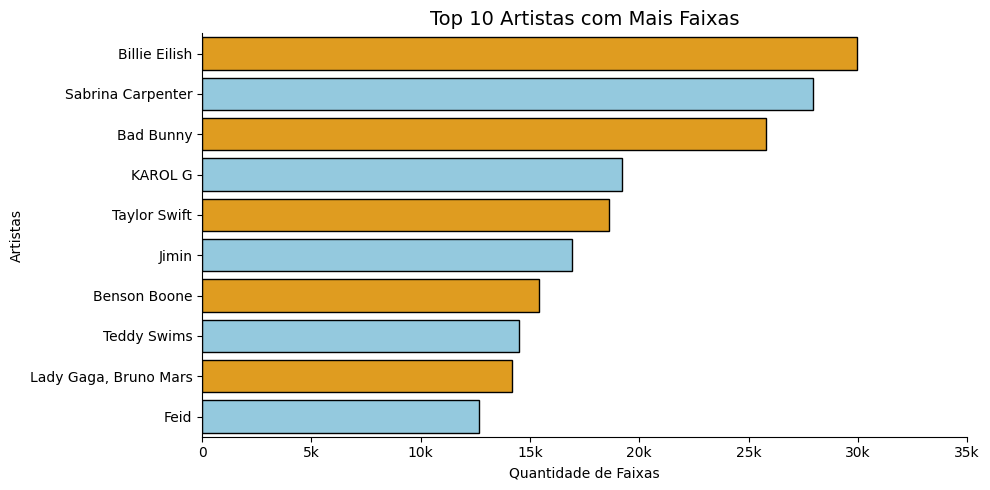

Número de classes (artistas únicos): 12644

Artista(s) | Quantidade de Ocorrências
---------------------------------------
$$Double-Dolla$$               | 1
$$Double-Dolla$$, Ruzoy        | 1
$OHO BANI, Herbert Grönemeyer, Ericson | 480
$ONO$ CLIQ, Drunken Masters, Jonko2x, Radrik Gee | 20
$ikario a.k.a Panemera panama  | 1


In [27]:
# 1. Top 10 artistas mais frequentes
top_artists = df['artists'].value_counts().head(10).reset_index()
top_artists.columns = ['artist', 'count']

# 2. Estatísticas descritivas
mean = top_artists['count'].mean()
std = top_artists['count'].std()
skewness = top_artists['count'].skew()
kurtosis = top_artists['count'].kurt()

print("\n Distribuição de faixas por artista (Top 10):")
print("Artista                    | Faixas")
print("-------------------------------------")
for i, row in top_artists.iterrows():
    print(f"{row['artist']:<25} | {row['count']}")

print("\n Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# Cores customizadas
colors = ['orange', 'skyblue']

# 3. Gráfico de barras horizontal
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_artists, y='artist', x='count', palette=colors, edgecolor='black')

# 4. Notação k no eixo X
xticks = ax.get_xticks()
xtick_labels = [f'{int(x/1000)}k' if x >= 1000 else str(int(x)) for x in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels)

# 5. Ajustes finais
sns.despine()
plt.title("Top 10 Artistas com Mais Faixas", fontsize=14)
plt.xlabel("Quantidade de Faixas")
plt.ylabel("Artistas")
plt.tight_layout()
plt.show()

# Contagem de classes (número de faixas por artista ou combinação de artistas)
artist_counts = df['artists'].value_counts().sort_index()

# Exibindo os primeiros resultados
num_classes = df['artists'].nunique()
print(f"Número de classes (artistas únicos): {num_classes}")

print("\nArtista(s) | Quantidade de Ocorrências")
print("---------------------------------------")
for artist, count in artist_counts.head().items():  # ou .items() para todos
    print(f"{artist:<30} | {count}")


286


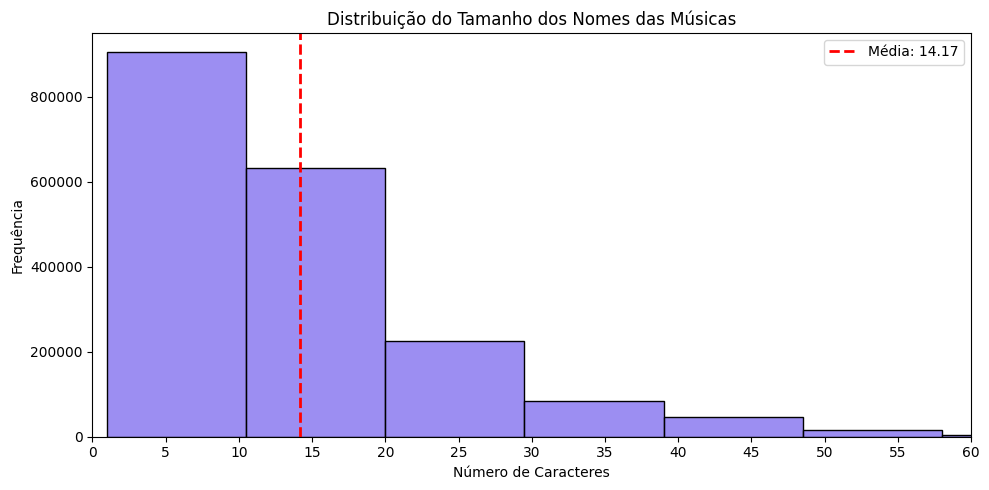

Tamanho do Nome | Quantidade de Músicas
-----------------------------------
1                | 1801
2                | 10316
3                | 41856
4                | 96586
5                | 113258
6                | 117251
7                | 130720
8                | 149691
9                | 130731
10               | 112739
11               | 107278
12               | 110278
13               | 70392
14               | 60689
15               | 62750
16               | 91347
17               | 45111
18               | 57322
19               | 27330
20               | 30705
21               | 30274
22               | 23994
23               | 24368
24               | 20503
25               | 11780
26               | 24190
27               | 16490
28               | 19417
29               | 22994
30               | 7018
31               | 15129
32               | 10405
33               | 9348
34               | 9114
35               | 12725
36               | 7933
37               | 75

In [35]:
# Histograma do tamanho dos nomes das músicas

# Garantir que todos os nomes sejam tratados como string
df['name_length'] = df['name'].apply(lambda x: len(str(x)))
print(df['name_length'].max())
# Estatísticas descritivas
mean = df['name_length'].mean()
std = df['name_length'].std()
skewness = df['name_length'].skew()
kurt = df['name_length'].kurt()

# Histograma com linha da média
plt.figure(figsize=(10, 5))
sns.histplot(df['name_length'], bins=30, color="mediumslateblue")

# Linha da média
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Média: {mean:.2f}')

# Ajuste do eixo X
plt.xlim(0, 60)  # Limita visualização
plt.xticks(np.arange(0, 61, 5))  # De 0 a 60, de 5 em 5

# Títulos e legendas
plt.title("Distribuição do Tamanho dos Nomes das Músicas")
plt.xlabel("Número de Caracteres")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()

# Contagem de classes
class_dist = df['name_length'].value_counts().sort_index()

# Print formatado
print("Tamanho do Nome | Quantidade de Músicas")
print("-" * 35)
for length, count in class_dist.items():
    print(f"{length:<16} | {count}")

# Número de classes
print(f"\nNúmero de classes distintas (comprimentos diferentes): {df['name_length'].nunique()}")

# Estatísticas descritivas
print("\nEstatísticas da Coluna 'name_length':")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f}")
print(f"Desvio padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurt:.2f}")


Estatísticas:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 128.02
Desvio Padrão: 614.42
Assimetria (Skewness): 19.61
Curtose: 593.06


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\814566040.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_albums, x='count', y='album_name', palette=colors)
C:\Users\henri\AppData\Local\Temp\ipykernel_24384\814566040.py:21: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_albums, x='count', y='album_name', palette=colors)


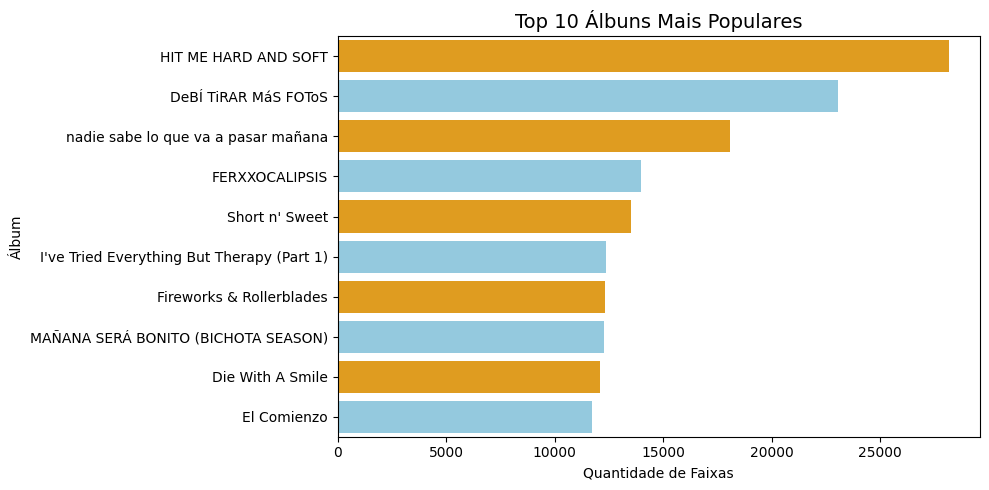

Número de classes: 15016
Álbum                     | Quantidade de Faixas
--------------------------------------------------
HIT ME HARD AND SOFT      | 28182
DeBÍ TiRAR MáS FOToS      | 23037
nadie sabe lo que va a pa | 18067
FERXXOCALIPSIS            | 13993
Short n' Sweet            | 13520
I've Tried Everything But | 12378
Fireworks & Rollerblades  | 12315
MAÑANA SERÁ BONITO (BICHO | 12295
Die With A Smile          | 12096
El Comienzo               | 11737
GOLDEN                    | 11727
MUSE                      | 11312
FELIZ CUMPLEAÑOS FERXXO T | 8939
rosie                     | 8808
greedy                    | 8513
MAÑANA SERÁ BONITO        | 8059
THE TORTURED POETS DEPART | 7797
Espresso                  | 7755
Lover                     | 7616
eternal sunshine          | 7072


In [48]:
# Top 10 álbuns mais populares
# Contagem de faixas por álbum
album_counts = df['album_name'].value_counts()
top_albums = album_counts.head(10).reset_index()
top_albums.columns = ['album_name', 'count']
colors = ['orange','skyblue']
# Estatísticas
mean = album_counts.mean()
std = album_counts.std()
skewness = album_counts.skew()
kurtosis = album_counts.kurt()

print("\nEstatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")
# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=top_albums, x='count', y='album_name', palette=colors)

plt.title("Top 10 Álbuns Mais Populares", fontsize=14)
plt.xlabel("Quantidade de Faixas")
plt.ylabel("Álbum")
plt.tight_layout()
plt.show()

# Distribuição de classes (quantos álbuns com x faixas)
album_counts = df['album_name'].value_counts()
num_classes = df['album_name'].nunique()
print(f"Número de classes: {num_classes}")

print("Álbum                     | Quantidade de Faixas")
print("-" * 50)
for album, count in album_counts.head(20).items(): # Tirar head para mostrar tudo
    print(f"{album[:25]:<25} | {count}")

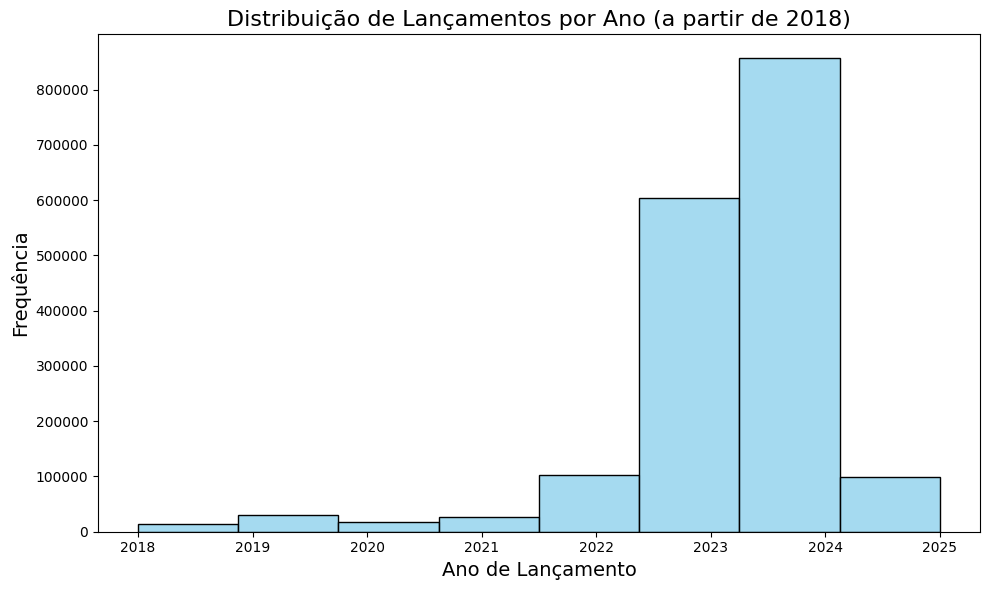

In [57]:
# album_release_date

# Filtrar os dados a partir de 2018
df_filtered = df[df['album_release_date'].dt.year >= 2018]

# Criar o histograma para os anos de lançamento
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x=df_filtered['album_release_date'].dt.year, color='skyblue', bins=df_filtered['album_release_date'].dt.year.nunique())
plt.title('Distribuição de Lançamentos por Ano (a partir de 2018)', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\3686474764.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


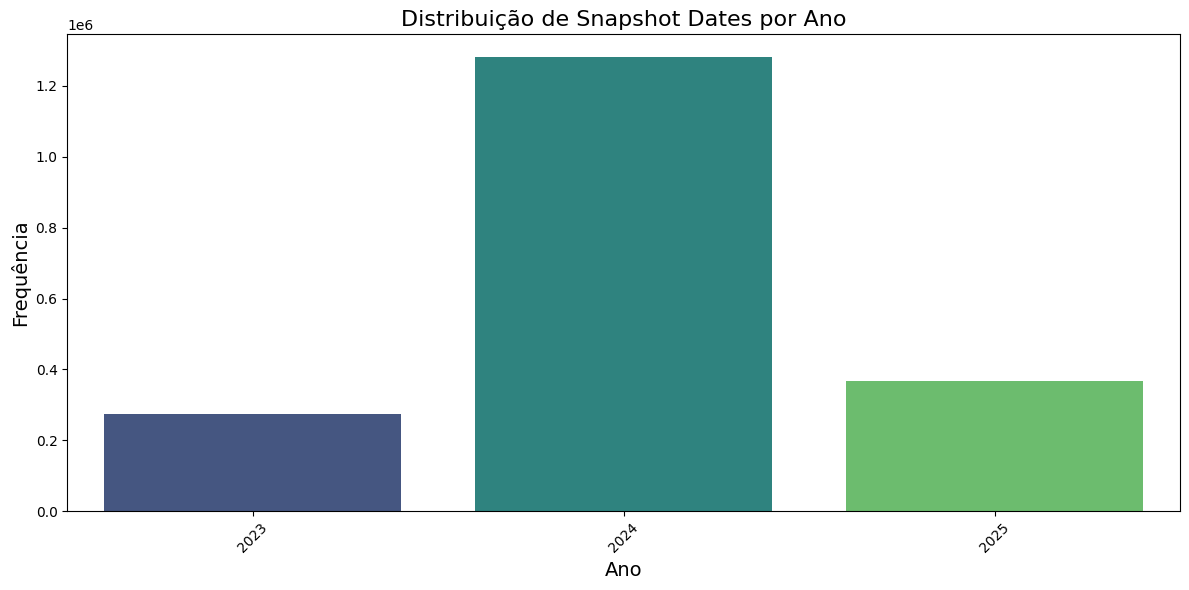

In [32]:
# snapshot_date

df['snapshot_year'] = df['snapshot_date'].dt.year

year_counts = df['snapshot_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")

plt.title('Distribuição de Snapshot Dates por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_24384\2013481659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_rank_counts.index, y=daily_rank_counts.values, palette="coolwarm")


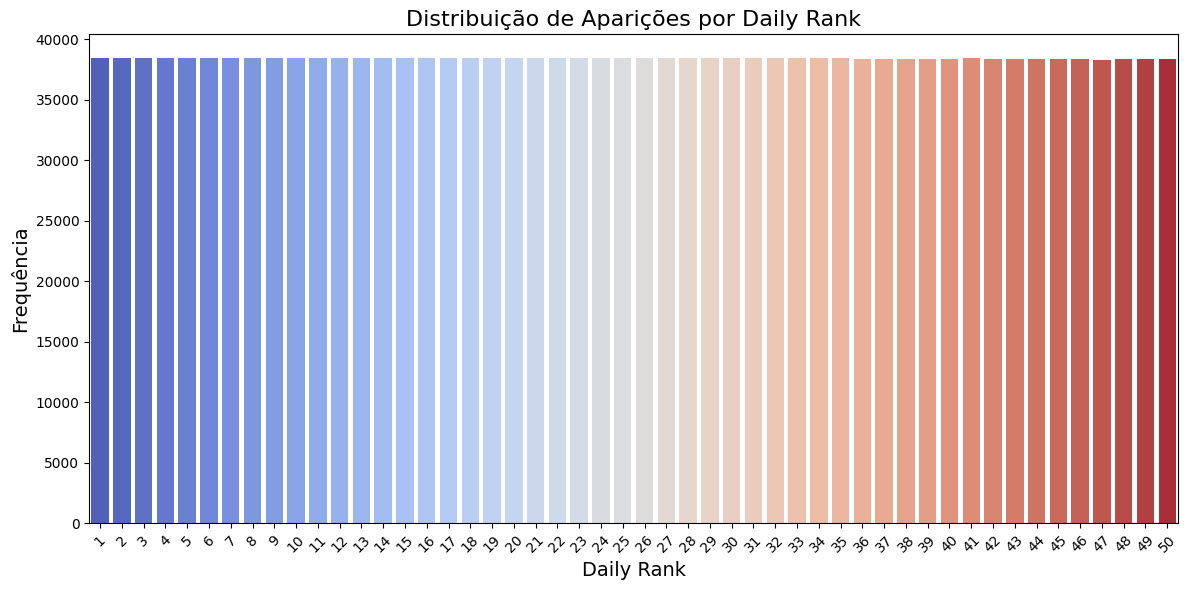

In [ ]:
# daily_rank
daily_rank_counts = df['daily_rank'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_rank_counts.index, y=daily_rank_counts.values, palette="coolwarm")
plt.title('Distribuição de Aparições por Daily Rank', fontsize=16)
plt.xlabel('Daily Rank', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Estatísticas:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 0.17 ms
Desvio Padrão: 0.12 ms
Assimetria (Skewness): 2.35
Curtose: 7.28


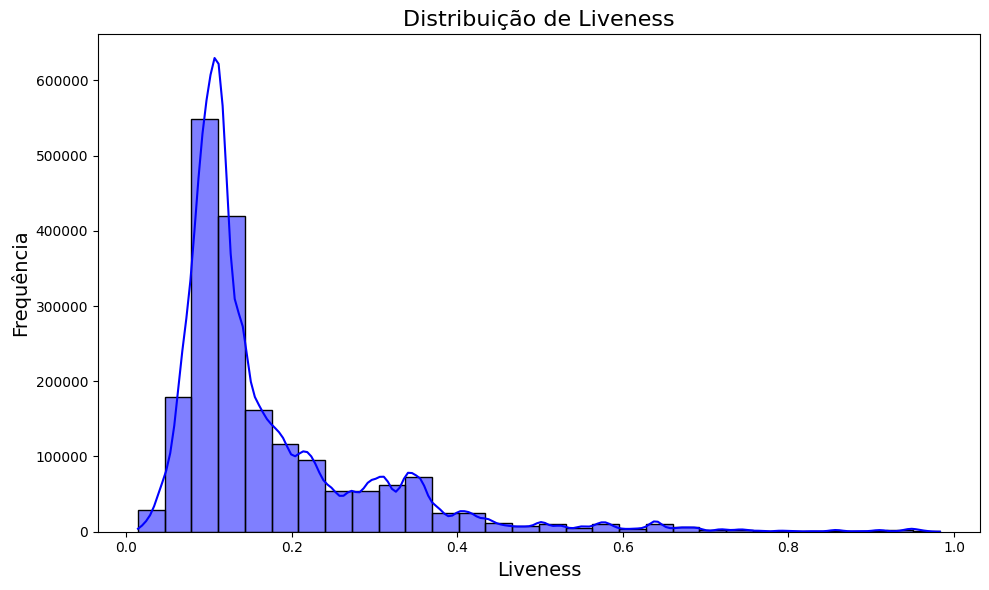

In [36]:
# Histograma da coluna 'liveness'

mean = df['liveness'].mean()
std = df['liveness'].std()
skewness = df['liveness'].skew()
kurtosis = df['liveness'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} ms")
print(f"Desvio Padrão: {std:.2f} ms")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")


plt.figure(figsize=(10, 6))
sns.histplot(df['liveness'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Liveness', fontsize=16)
plt.xlabel('Liveness', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()


--- Estatísticas de 'tempo' (BPM) ---

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A curtose é próxima de zero: distribuição mesocúrtica, semelhante à normal.
Média: 122.13 BPM
Desvio padrão: 27.92
Assimetria (Skewness): 0.48
Curtose: -0.24
Valor mínimo: 0.00 BPM
Valor máximo: 236.09 BPM
Distribuição estimada: Aproximadamente normal

--- Contagem de Classes ---
(-0.236, 7.87]: 1 faixas
(7.87, 15.739]: 0 faixas
(15.739, 23.609]: 0 faixas
(23.609, 31.479]: 0 faixas
(31.479, 39.348]: 2 faixas
(39.348, 47.218]: 276 faixas
(47.218, 55.087]: 2406 faixas
(55.087, 62.957]: 1065 faixas
(62.957, 70.827]: 14404 faixas
(70.827, 78.696]: 48321 faixas
(78.696, 86.566]: 75382 faixas
(86.566, 94.436]: 142141 faixas
(94.436, 102.305]: 270195 faixas
(102.305, 110.175]: 204845 faixas
(110.175, 118.044]: 171091 faixas
(118.044, 125.914]: 201652 faixas
(125.914, 133.784]: 189830 faixas
(133.784, 141.653]: 139411 faixas

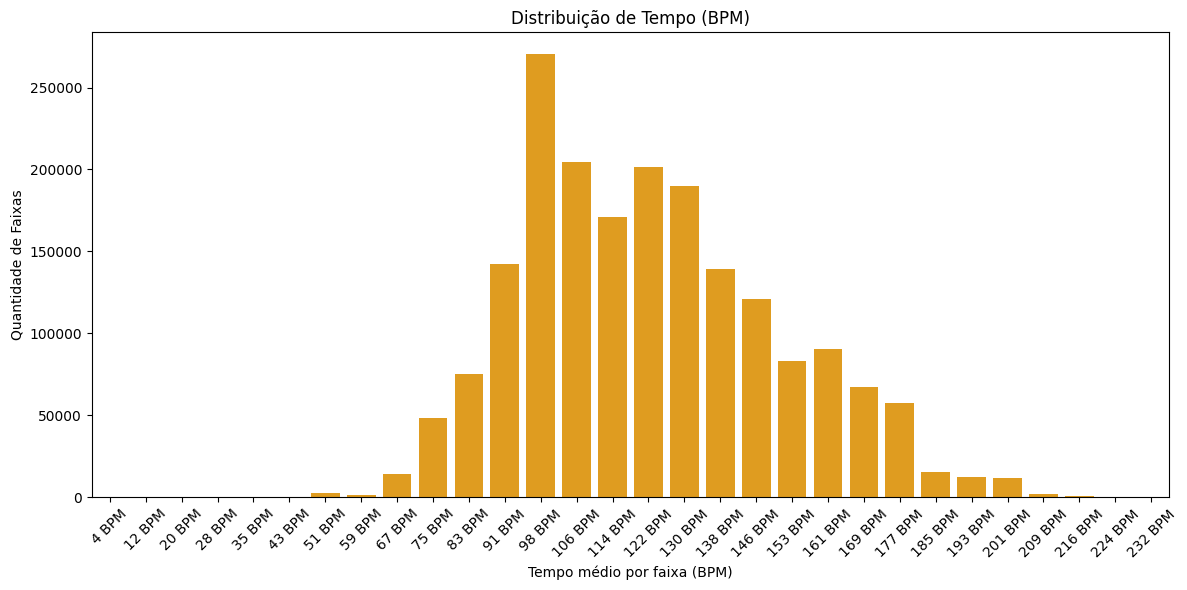

In [ ]:

# tempo - Distribuição de BPM (batidas por minuto)

# Define os bins
bins = 30
df['tempo_bin'] = pd.cut(df['tempo'], bins=bins)

# Conta as faixas por intervalo
tempo_counts = df['tempo_bin'].value_counts().sort_index()

# Estatísticas descritivas
mean = df['tempo'].mean()
std = df['tempo'].std()
skewness = df['tempo'].skew()
kurtosis = df['tempo'].kurt()
min_tempo = df['tempo'].min()
max_tempo = df['tempo'].max()

print("\n--- Estatísticas de 'tempo' (BPM) ---")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} BPM")
print(f"Desvio padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")
print(f"Valor mínimo: {min_tempo:.2f} BPM")
print(f"Valor máximo: {max_tempo:.2f} BPM")

# Determinar a distribuição (avaliação empírica com base na skewness e kurtosis)
if abs(skewness) < 0.5 and abs(kurtosis) < 1:
    dist_type = "Aproximadamente normal"
elif skewness > 1:
    dist_type = "Assimétrica à direita (distribuição inclinada positivamente)"
elif skewness < -1:
    dist_type = "Assimétrica à esquerda (distribuição inclinada negativamente)"
else:
    dist_type = "Distribuição moderadamente assimétrica"

print(f"Distribuição estimada: {dist_type}")

# Contagem de classes (intervalos de BPM)
print("\n--- Contagem de Classes ---")
for interval, count in tempo_counts.items():
    print(f"{interval}: {count} faixas")
print(f"\nNúmero total de classes: {tempo_counts.shape[0]}")

# Rótulos simples: valor médio do intervalo (arredondado)
labels = [f"{(interval.left + interval.right)/2:.0f} BPM" for interval in tempo_counts.index]

# Plot do gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=labels, y=tempo_counts.values, color='orange')
plt.xticks(rotation=45)
plt.title("Distribuição de Tempo (BPM)")
plt.xlabel("Tempo médio por faixa (BPM)")
plt.ylabel("Quantidade de Faixas")
plt.tight_layout()
plt.show()

Estatísticas da variável 'loudness':

Distribuição:
 A distribuição possui assimetria negativa: a média é menor que a mediana e a moda. A cauda da esquerda é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: -6.71 dB
Desvio Padrão: 3.68
Assimetria (Skewness): -4.36
Curtose: 33.58

Distribuição de Classes (faixas por intervalo de loudness):
 -53.41 dB | 269 faixas
 -51.46 dB | 0 faixas
 -49.54 dB | 0 faixas
 -47.62 dB | 0 faixas
 -45.70 dB | 2277 faixas
 -43.79 dB | 0 faixas
 -41.87 dB | 0 faixas
 -39.95 dB | 0 faixas
 -38.03 dB | 10 faixas
 -36.11 dB | 0 faixas
 -34.19 dB | 3151 faixas
 -32.27 dB | 4704 faixas
 -30.35 dB | 2644 faixas
 -28.43 dB | 151 faixas
 -26.51 dB | 3911 faixas
 -24.59 dB | 187 faixas
 -22.68 dB | 421 faixas
 -20.76 dB | 2684 faixas
 -18.84 dB | 3634 faixas
 -16.92 dB | 5234 faixas
 -15.00 dB | 14049 faixas
 -13.08 dB | 36160 faixas
 -11.16 dB | 92243 faixas
  -9.24 dB | 236593 faixas
  -7.32 dB | 4

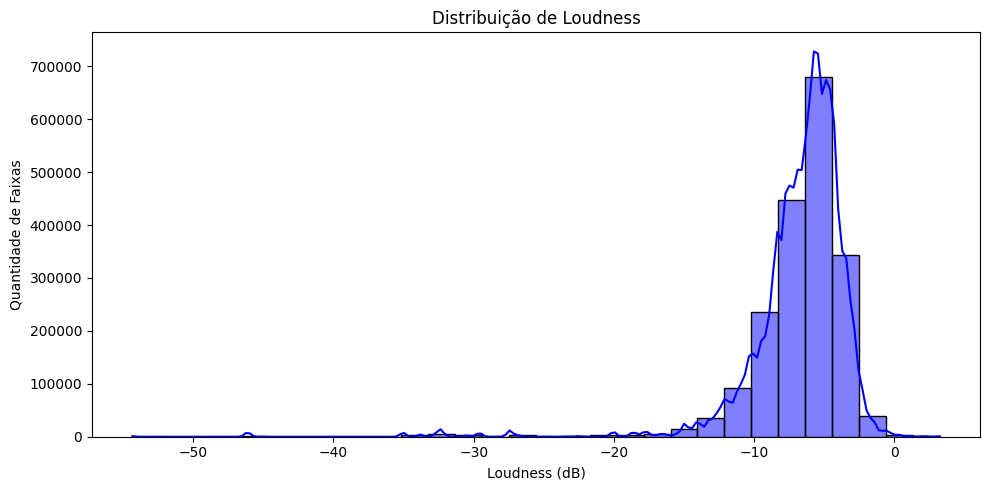

In [24]:
# loudness (Intervalos de loudness)
# 1. Criação dos bins para a variável 'loudness'
bins = 30
df['loudness_bin'] = pd.cut(df['loudness'], bins=bins)

# 2. Contagem de faixas por intervalo
loudness_counts = df['loudness_bin'].value_counts().sort_index()

# 3. Estatísticas descritivas
mean = df['loudness'].mean()
std = df['loudness'].std()
skewness = df['loudness'].skew()
kurtosis = df['loudness'].kurt()

print("Estatísticas da variável 'loudness':")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} dB")
print(f"Desvio Padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# 4. Distribuição de classes
print("\nDistribuição de Classes (faixas por intervalo de loudness):")
for interval, count in loudness_counts.items():
    label = f"{(interval.left + interval.right)/2:.2f} dB"
    print(f"{label:>10} | {count} faixas")

# 5. Plot
plt.figure(figsize=(10, 5))
sns.histplot(df['loudness'], bins=bins, color='blue', kde=True)

plt.title("Distribuição de Loudness")
plt.xlabel("Loudness (dB)")
plt.ylabel("Quantidade de Faixas")
plt.tight_layout()
plt.show()

 Estatísticas:

Distribuição:
 A distribuição possui assimetria negativa: a média é menor que a mediana e a moda. A cauda da esquerda é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 0.6485
Desvio Padrão: 0.1681
Assimetria (Skewness): -0.69
Curtose: 0.64


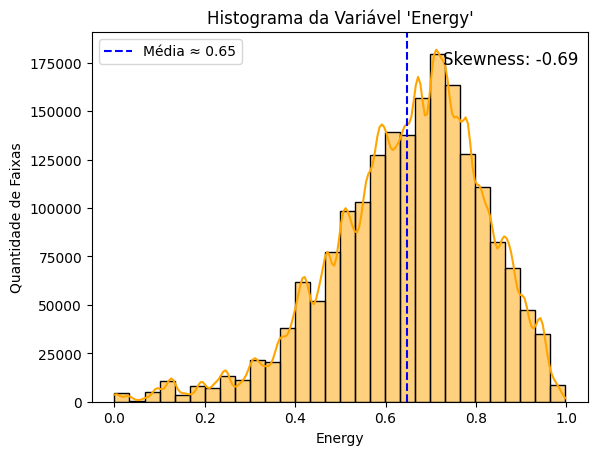

In [21]:
# energy
# 1. Estatísticas descritivas da variável 'energy'
mean = df['energy'].mean()
std = df['energy'].std()
skewness = df['energy'].skew()
kurtosis = df['energy'].kurt()

print(" Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.4f}")
print(f"Desvio Padrão: {std:.4f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# 2. Histograma com Seaborn
ax = sns.histplot(df['energy'], bins=30, color='orange', edgecolor='black', kde=True)

# Linha da média
ax.axvline(x=mean, color='blue', linestyle='--', label=f'Média ≈ {mean:.2f}')

# Texto da skewness
ax.text(0.98, 0.95, f"Skewness: {skewness:.2f}", ha='right', va='top', transform=ax.transAxes, fontsize=12)

# Estética do gráfico
ax.set_title("Histograma da Variável 'Energy'")
ax.set_xlabel("Energy")
ax.set_ylabel("Quantidade de Faixas")
ax.legend()

Estatísticas:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 194047.90 ms
Desvio Padrão: 49737.35 ms
Assimetria (Skewness): 1.81
Curtose: 10.50

Distribuição de Classes (faixas por intervalo de duração):
  31s | 137
  62s | 1975
  93s | 20495
 124s | 152322
 154s | 441095
 185s | 592621
 216s | 371380
 247s | 193982
 277s | 90569
 308s | 28880
 339s | 10593
 370s | 7344
 401s | 3327
 431s | 2175
 462s | 2036
 493s | 513
 524s | 788
 554s | 793
 585s | 265
 616s | 234
 647s | 393
 678s | 58
 708s | 161
 739s | 21
 770s | 16
 801s | 8
 831s | 3
 862s | 0
 893s | 0
 924s | 101


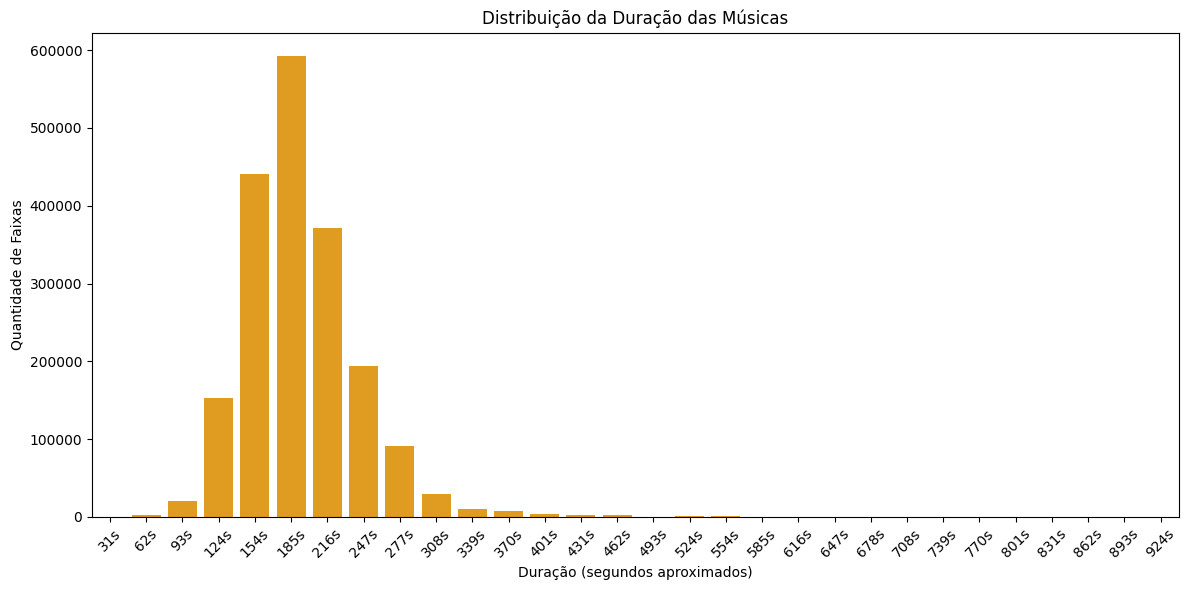

In [29]:
# duration_ms
bins = 30
df['duration_bin'] = pd.cut(df['duration_ms'], bins=bins)

# 2. Contagem por intervalo
duration_counts = df['duration_bin'].value_counts().sort_index()

# 3. Rótulos para o eixo X com o valor do meio de cada intervalo em segundos
labels = [f"{int((interval.left + interval.right) // 2 // 1000)}s" for interval in duration_counts.index]

# 4. Estatísticas descritivas da duração (em milissegundos)
mean = df['duration_ms'].mean()
std = df['duration_ms'].std()
skewness = df['duration_ms'].skew()
kurtosis = df['duration_ms'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} ms")
print(f"Desvio Padrão: {std:.2f} ms")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# 5. Contagem de classes (bins de duração)
print("\nDistribuição de Classes (faixas por intervalo de duração):")
for label, count in zip(labels, duration_counts.values):
    print(f"{label:>5} | {count}")

# 6. Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=duration_counts.values, color='orange')

# Estética
plt.xticks(rotation=45)
plt.title("Distribuição da Duração das Músicas")
plt.xlabel("Duração (segundos aproximados)")
plt.ylabel("Quantidade de Faixas")
plt.tight_layout()
plt.show()

Estatísticas da Variação Semanal no Ranking:

Distribuição:
 A distribuição possui assimetria negativa: a média é menor que a mediana e a moda. A cauda da esquerda é mais longa.
 A curtose é próxima de zero: distribuição mesocúrtica, semelhante à normal.
Média: 0.68
Desvio Padrão: 0.14
Assimetria (Skewness): -0.62
Curtose: 0.24


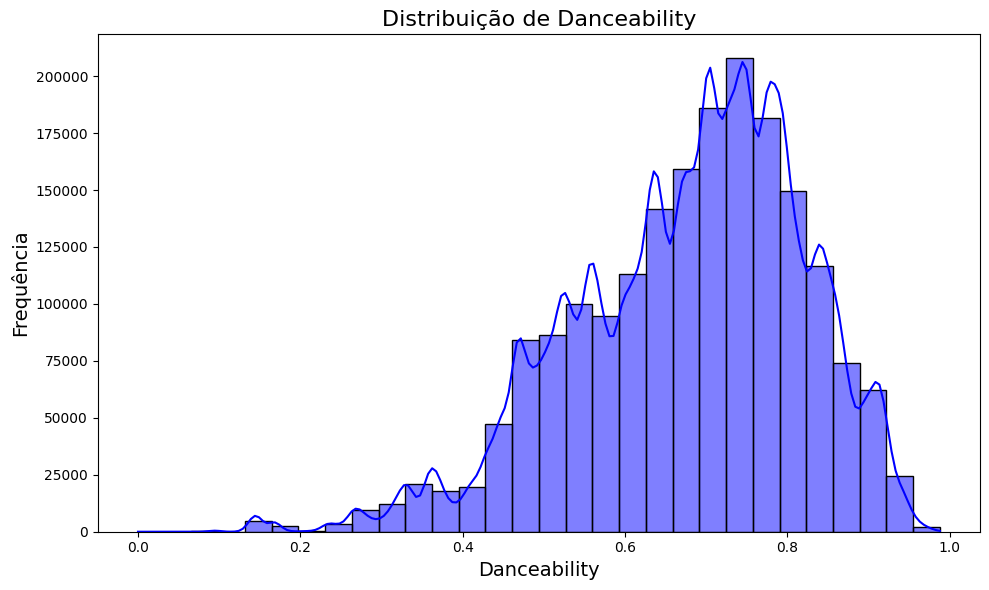

In [33]:
mean = df['danceability'].mean()
std = df['danceability'].std()
skewness = df['danceability'].skew()
kurtosis = df['danceability'].kurt()  # Curtose excessiva

print("Estatísticas da Variação Semanal no Ranking:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(df['danceability'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Danceability', fontsize=16)
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()

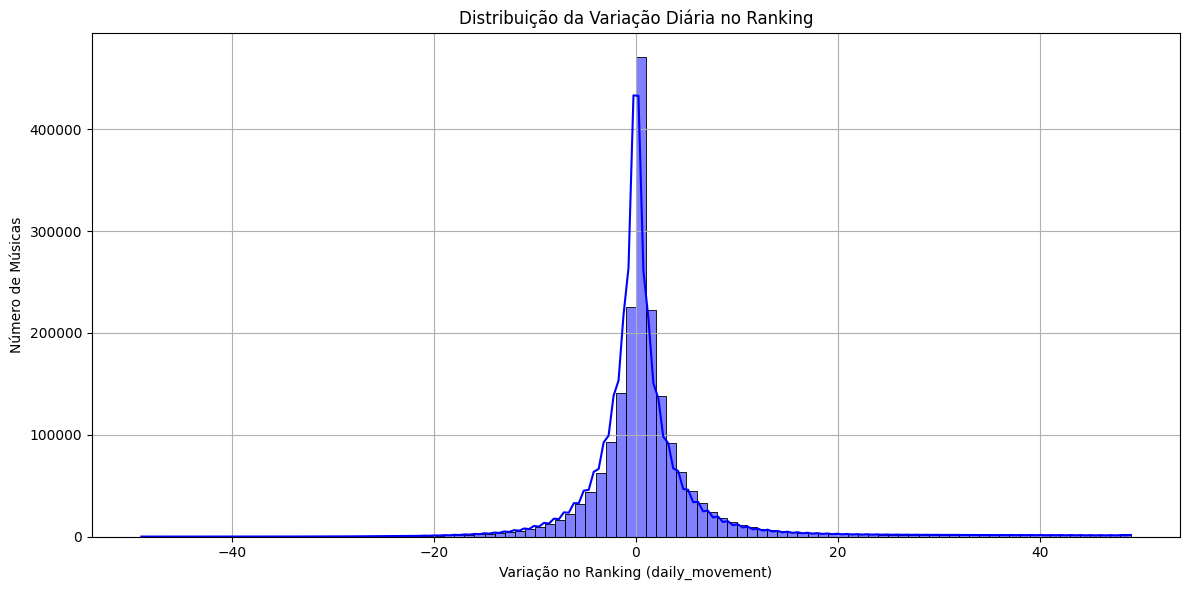

Estatísticas da Variação Diária no Ranking:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 0.90
Desvio Padrão: 6.96
Assimetria (Skewness): 2.86
Curtose: 15.73
Variação no Ranking | Número de Músicas
                 -49 | 4
                 -48 | 2
                 -47 | 1
                 -46 | 2
                 -45 | 2
                 -44 | 5
                 -43 | 14
                 -42 | 13
                 -41 | 15
                 -40 | 19
                 -39 | 26
                 -38 | 26
                 -37 | 29
                 -36 | 54
                 -35 | 54
                 -34 | 67
                 -33 | 90
                 -32 | 116
                 -31 | 162
                 -30 | 174
                 -29 | 168
                 -28 | 233
                 -27 | 277
              

In [22]:
# DAILY MOVEMENT
# Plotando Histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['daily_movement'], bins=range(df['daily_movement'].min(), df['daily_movement'].max() + 1),
             kde=True, color='blue', edgecolor='black')

plt.title('Distribuição da Variação Diária no Ranking')
plt.xlabel('Variação no Ranking (daily_movement)')
plt.ylabel('Número de Músicas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cálculo das estatísticas
mean = df['daily_movement'].mean()
std = df['daily_movement'].std()
skewness = df['daily_movement'].skew()
kurtosis = df['daily_movement'].kurt()  # excess kurtosis

# Impressão dos resultados
print("Estatísticas da Variação Diária no Ranking:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# Contando quantas vezes cada variação inteira aparece
contagem_variacoes = df['daily_movement'].value_counts().sort_index()

# Exibindo como tabela
print("Variação no Ranking | Número de Músicas")
for variacao, qtd in contagem_variacoes.head(50).items(): # Tirar head para ver todos
    print(f"{variacao:>20} | {qtd}")

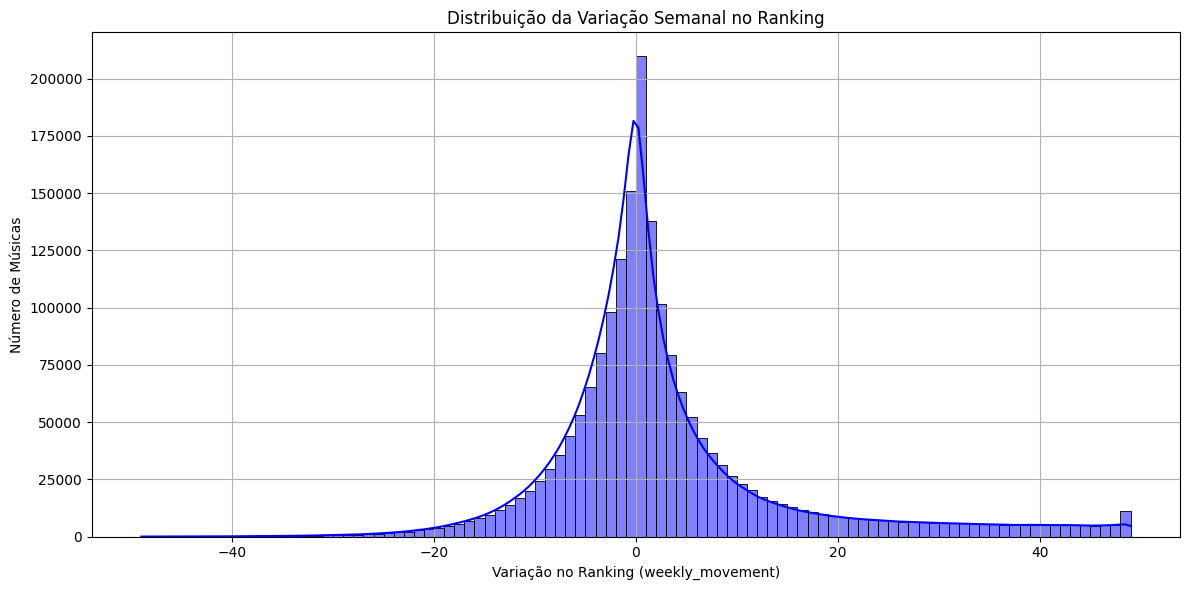

Estatísticas da Variação Semanal no Ranking:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 2.74
Desvio Padrão: 12.11
Assimetria (Skewness): 1.53
Curtose: 3.40

Variação no Ranking | Quantidade de Músicas
                 -49 | 2
                 -48 | 12
                 -47 | 9
                 -46 | 21
                 -45 | 25
                 -44 | 40
                 -43 | 46
                 -42 | 58
                 -41 | 67
                 -40 | 114
                 -39 | 137
                 -38 | 171
                 -37 | 191
                 -36 | 224
                 -35 | 268
                 -34 | 363
                 -33 | 370
                 -32 | 448
                 -31 | 555
                 -30 | 677


In [23]:
# WEEKLY MOVEMENT
# 1. Histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['weekly_movement'], bins=range(df['weekly_movement'].min(), df['weekly_movement'].max() + 1),
             kde=True, color='blue', edgecolor='black')

plt.title('Distribuição da Variação Semanal no Ranking')
plt.xlabel('Variação no Ranking (weekly_movement)')
plt.ylabel('Número de Músicas')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Estatísticas descritivas
mean = df['weekly_movement'].mean()
std = df['weekly_movement'].std()
skewness = df['weekly_movement'].skew()
kurtosis = df['weekly_movement'].kurt()  # Curtose excessiva

print("Estatísticas da Variação Semanal no Ranking:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f}")
print(f"Desvio Padrão: {std:.2f}")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# 3. Contagem direta dos valores inteiros (frequência por variação)
contagem_variacoes = df['weekly_movement'].value_counts().sort_index()

print("\nVariação no Ranking | Quantidade de Músicas")
for variacao, qtd in contagem_variacoes.head(20).items(): # Tirar head para ver todos
    print(f"{variacao:>20} | {qtd}")


Estatísticas:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 0.10 ms
Desvio Padrão: 0.09 ms
Assimetria (Skewness): 2.23
Curtose: 5.70


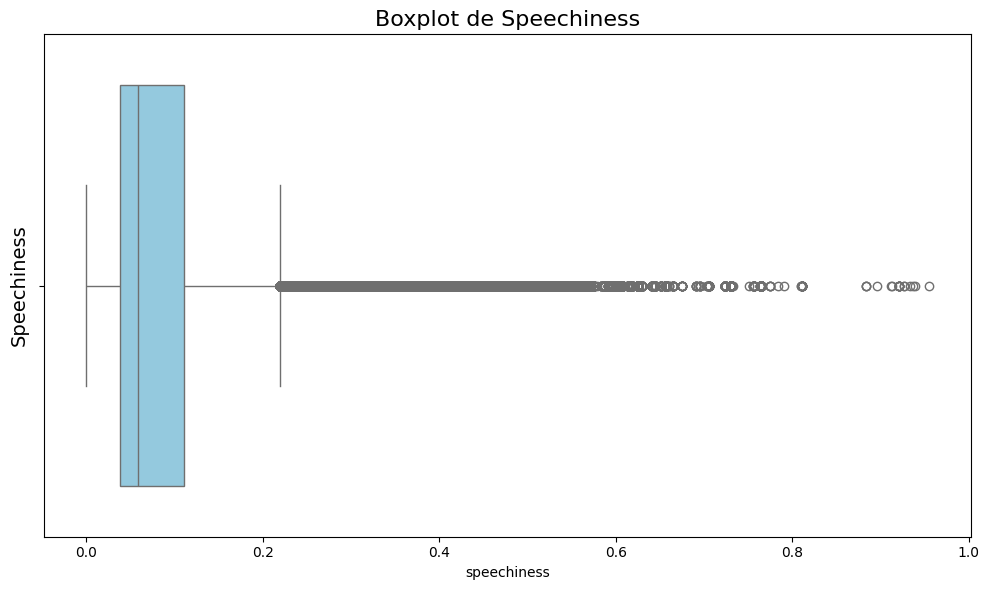

In [37]:
# Speechiness
mean = df['speechiness'].mean()
std = df['speechiness'].std()
skewness = df['speechiness'].skew()
kurtosis = df['speechiness'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} ms")
print(f"Desvio Padrão: {std:.2f} ms")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='speechiness', color='skyblue')
plt.title('Boxplot de Speechiness', fontsize=16)
plt.ylabel('Speechiness', fontsize=14)
plt.tight_layout()
plt.show()


Estatísticas:

Distribuição:
 A distribuição possui assimetria negativa: a média é menor que a mediana e a moda. A cauda da esquerda é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 3.90 ms
Desvio Padrão: 0.41 ms
Assimetria (Skewness): -3.63
Curtose: 20.89


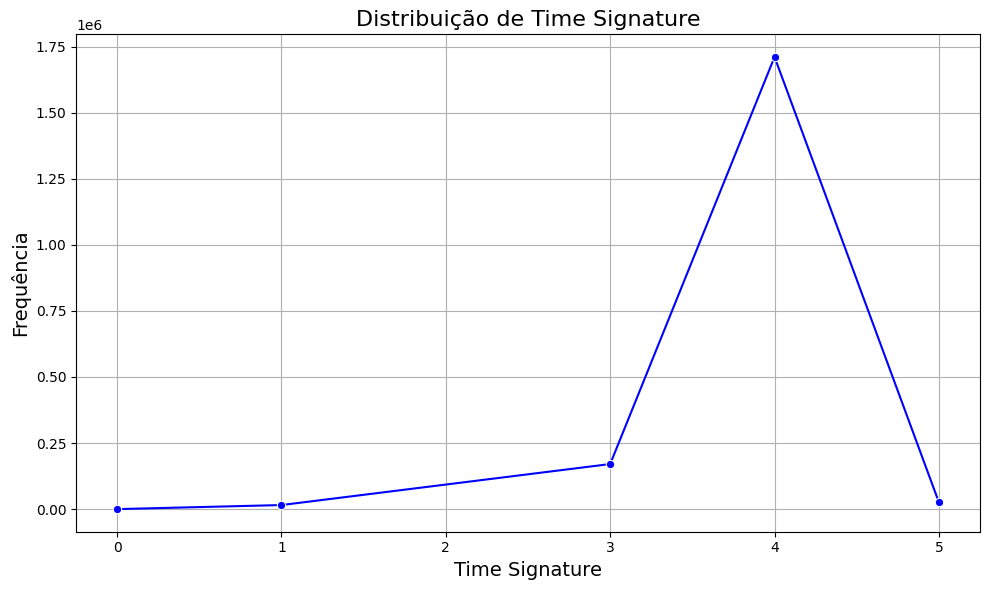

In [75]:
# Contar os valores únicos da coluna 'time_signature'
time_signature_counts = df['time_signature'].value_counts().sort_index()

mean = df['time_signature'].mean()
std = df['time_signature'].std()
skewness = df['time_signature'].skew()
kurtosis = df['time_signature'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} ms")
print(f"Desvio Padrão: {std:.2f} ms")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_signature_counts.index, y=time_signature_counts.values, marker='o', color='blue')
plt.title('Distribuição de Time Signature', fontsize=16)
plt.xlabel('Time Signature', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Estatísticas:

Distribuição:
 A distribuição é aproximadamente simétrica.
 A distribuição é platicúrtica: tem caudas mais leves e topo mais achatado que a normal.
Média: 0.55 ms
Desvio Padrão: 0.23 ms
Assimetria (Skewness): -0.09
Curtose: -0.90


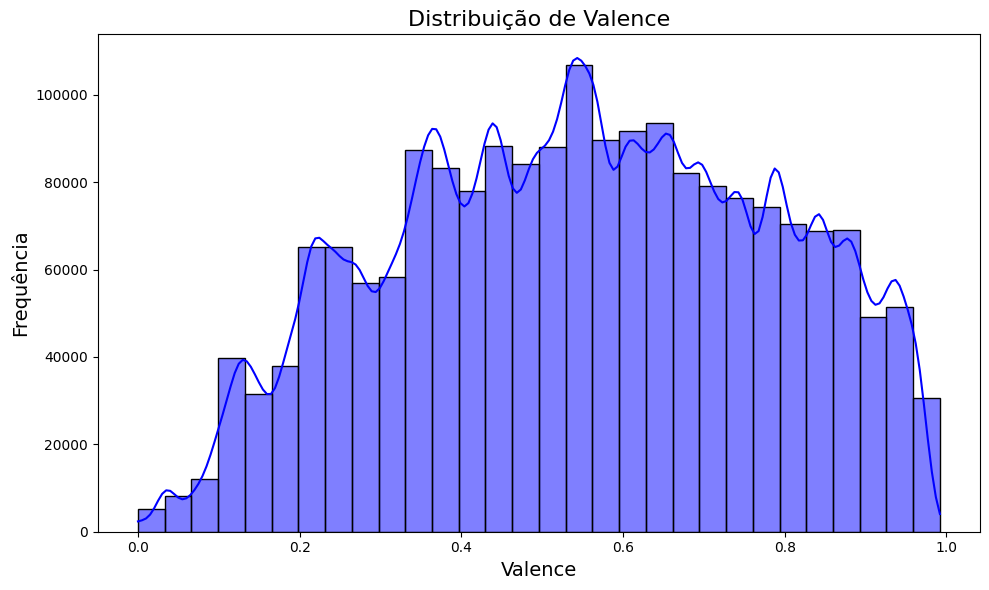

In [39]:
# Criar um histograma para a coluna 'valence'
mean = df['valence'].mean()
std = df['valence'].std()
skewness = df['valence'].skew()
kurtosis = df['valence'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} ms")
print(f"Desvio Padrão: {std:.2f} ms")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(df['valence'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Valence', fontsize=16)
plt.xlabel('Valence', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()


Estatísticas:

Distribuição:
 A distribuição é aproximadamente simétrica.
 A distribuição é platicúrtica: tem caudas mais leves e topo mais achatado que a normal.
Média: 5.54 ms
Desvio Padrão: 3.59 ms
Assimetria (Skewness): -0.07
Curtose: -1.28


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\2954757195.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=key_counts.index, y=key_counts.values, palette="viridis")


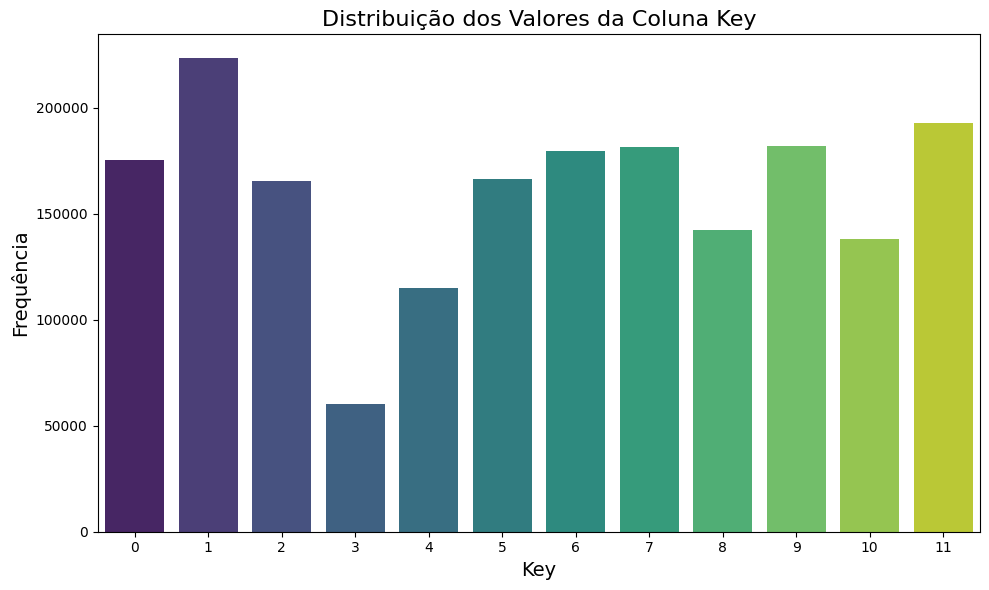

In [40]:
# Contar os valores únicos da coluna 'key'
key_counts = df['key'].value_counts().sort_index()

mean = df['key'].mean()
std = df['key'].std()
skewness = df['key'].skew()
kurtosis = df['key'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness, kurtosis)
print(f"Média: {mean:.2f} ms")
print(f"Desvio Padrão: {std:.2f} ms")
print(f"Assimetria (Skewness): {skewness:.2f}")
print(f"Curtose: {kurtosis:.2f}")

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=key_counts.index, y=key_counts.values, palette="viridis")
plt.title('Distribuição dos Valores da Coluna Key', fontsize=16)
plt.xlabel('Key', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.tight_layout()
plt.show()

# **Multivariate data analysis**

In this section, you should plot at least **5 multivariate visualizations**. The key here is to investigate underlying correlations and behaviors within the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **ONE** non-obvious behavior in the data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. Explain why you have selected these specific variables and what you expect to discover through their relationship;
2. Determine what kind of visualization is the most suitable;
3. Report the findings and discuss whether they corroborate or not the aforementioned hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For example, consider applying techniques such as PCA, t-SNE, or even others that we haven't covered in the lectures. The goal is to cultivate a critical mindset toward data analysis and our work.

### Important

It is strictly prohibited to create multivariate visualizations using variables that were not included in the previous section (univariate data analysis).

### **Análise Linkin Park**

Após o falecimento do vocalista da banda em 2017, a popularidade do Linkin Park permaneceu em declínio, com poucas atividades relevantes no cenário musical. No entanto, a banda experimentou um ressurgimento significativo após o anúncio de sua nova vocalista e o lançamento do álbum From Zero. Esse retorno marcou um momento de ascensão rápida na popularidade do grupo.

Abaixo, apresentamos uma análise detalhada do impacto desse retorno, considerando os períodos antes e depois dos lançamentos marcantes:

- Lançamento do single "**The Emptiness Machine**": 5 de setembro de 2024
- Lançamento do álbum "**From Zero**": 15 de novembro de 2024

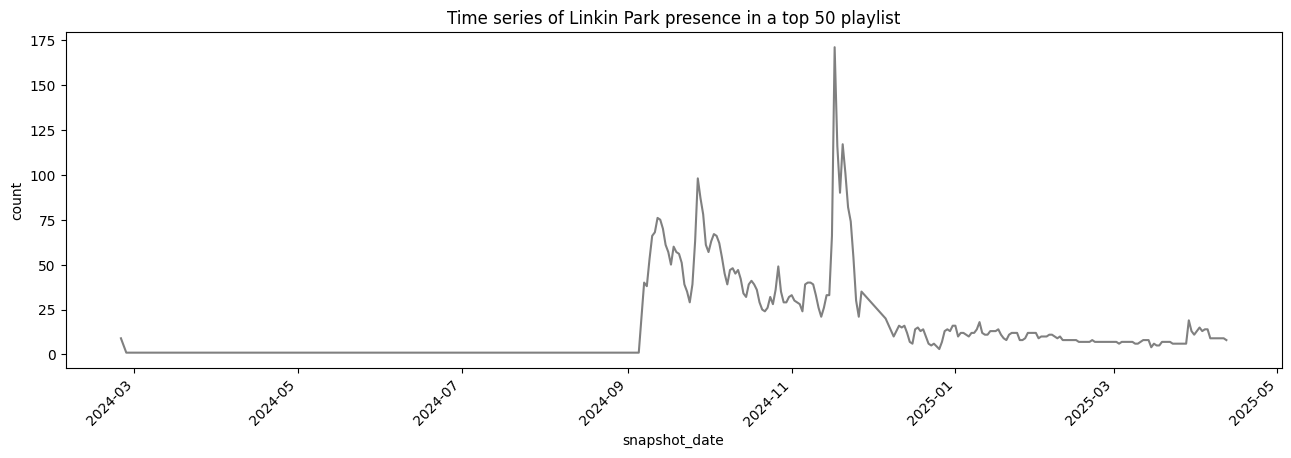

In [7]:
# data only of linkin park
lp = df[df['artists']=='Linkin Park']
lp['snapshot_date'].min()
# data only of linkin park
lp = df[df['artists']=='Linkin Park']
# transform the 'snapshot_date' to date
lp.loc[:,'snapshot_date'] = pd.to_datetime(lp['snapshot_date'],format="%Y-%m-%d")
# time series
songs_per_date = lp['snapshot_date'].value_counts()
df_songs_per_date = pd.DataFrame(songs_per_date).sort_values(by='snapshot_date')

# plot
sns.lineplot(data=df_songs_per_date,x='snapshot_date',y='count',color='gray')
plt.title('Time series of Linkin Park presence in a top 50 playlist')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(top=0.9, left=0.1, right=2, bottom=0.2)

### **Danceability do From Zero**

As músicas do álbum From Zero possuem, em média, o mesmo nível de danceability que o restante das músicas da discografia do artista.

Estatísticas:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A curtose é próxima de zero: distribuição mesocúrtica, semelhante à normal.
Média: 0.50
Desvio Padrão: 0.05
Assimetria (Skewness): 1.07
Curtose: -0.23


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\1770113773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=from_zero_songs, x='name', y='danceability', palette='coolwarm')


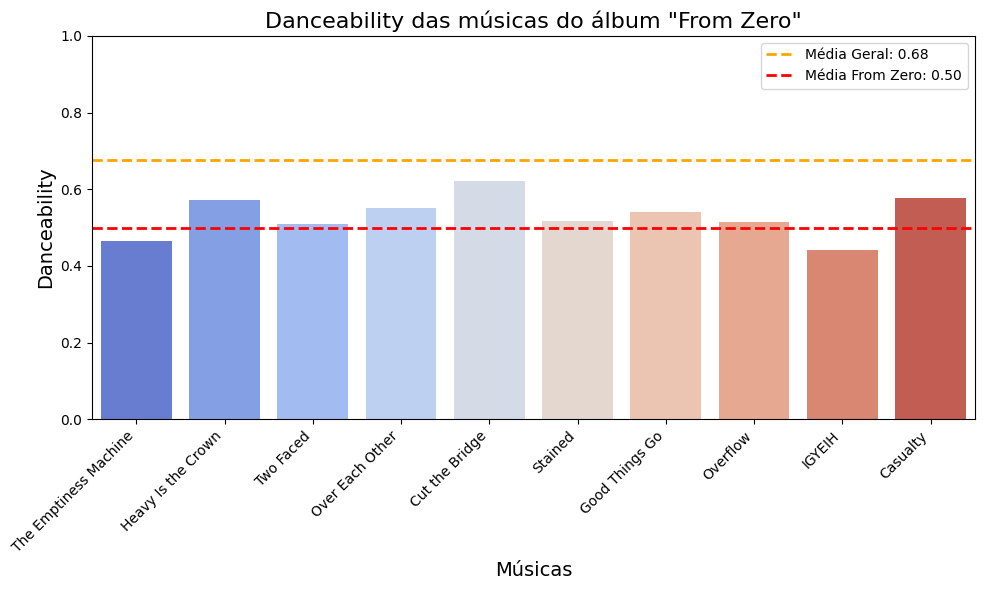

In [71]:
# Filtrar as músicas do álbum "From Zero"
from_zero_songs = df[df['album_name'] == 'From Zero']

plt.figure(figsize=(10, 6))
sns.barplot(data=from_zero_songs, x='name', y='danceability', palette='coolwarm')

# Estatísticas para 'danceability' das músicas do álbum "From Zero"
mean_danceability = from_zero_songs['danceability'].mean()
std_danceability = from_zero_songs['danceability'].std()
skewness_danceability = from_zero_songs['danceability'].skew()
kurtosis_danceability = from_zero_songs['danceability'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness_danceability, kurtosis_danceability)
print(f"Média: {mean_danceability:.2f}")
print(f"Desvio Padrão: {std_danceability:.2f}")
print(f"Assimetria (Skewness): {skewness_danceability:.2f}")
print(f"Curtose: {kurtosis_danceability:.2f}")

mean_danceability = from_zero_songs['danceability'].mean()
meanG_danceability = df['danceability'].mean()

plt.axhline(meanG_danceability, color='orange', linestyle='--', linewidth=2, label=f'Média Geral: {meanG_danceability:.2f}')
plt.axhline(mean_danceability, color='red', linestyle='--', linewidth=2, label=f'Média From Zero: {mean_danceability:.2f}')

plt.title('Danceability das músicas do álbum "From Zero"', fontsize=16)
plt.xlabel('Músicas', fontsize=14)
plt.ylabel('Danceability', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Popularidade das músicas do From Zero
As músicas do álbum From Zero têm níveis de popularidade semelhantes entre si, sem grande variação.

Estatísticas:

Distribuição:
 A distribuição possui assimetria negativa: a média é menor que a mediana e a moda. A cauda da esquerda é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 78.80
Desvio Padrão: 5.55
Assimetria (Skewness): -2.61
Curtose: 12.11


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\3389456276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=from_zero_songs, x='name', y='popularity', palette='Set3')


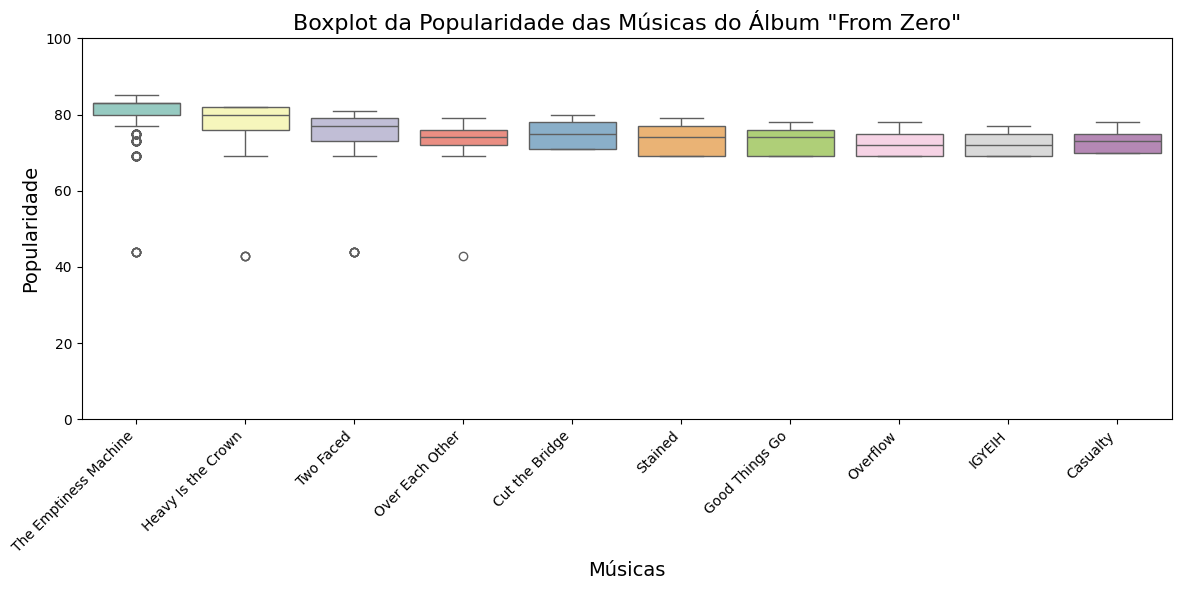

In [46]:
# Criar o gráfico de caixa para popularidade das músicas do álbum "From Zero"
plt.figure(figsize=(12, 6))
sns.boxplot(data=from_zero_songs, x='name', y='popularity', palette='Set3')

# Estatísticas para 'popularity' das músicas do álbum "From Zero"
mean_pop = from_zero_songs['popularity'].mean()
std_pop = from_zero_songs['popularity'].std()
skewness_pop = from_zero_songs['popularity'].skew()
kurtosis_pop = from_zero_songs['popularity'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness_pop, kurtosis_pop)
print(f"Média: {mean_pop:.2f}")
print(f"Desvio Padrão: {std_pop:.2f}")
print(f"Assimetria (Skewness): {skewness_pop:.2f}")
print(f"Curtose: {kurtosis_pop:.2f}")

# Configurações do gráfico
plt.title('Boxplot da Popularidade das Músicas do Álbum "From Zero"', fontsize=16)
plt.xlabel('Músicas', fontsize=14)
plt.ylabel('Popularidade', fontsize=14)
plt.ylim(0, 100)  # Define os limites do eixo y de 0 a 100
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Popularidade Músicas Solo x Colab**
Devido ao sucesso de músicas com colaborações como Die With a Smile de Bruno Mars e Lady Gaga surgiu a dúvida de se músicas com colab são mais populares do que músicas solos. Abaixo analisamos as colunas de artistas e nomes para saber se tem colaborações e analisamos a coluna de popularidade. O resultado foi que músicas solos são ligeiramente mais populares.

C:\Users\henri\AppData\Local\Temp\ipykernel_24384\1056667997.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='collab_type', y='popularity', palette=colors)


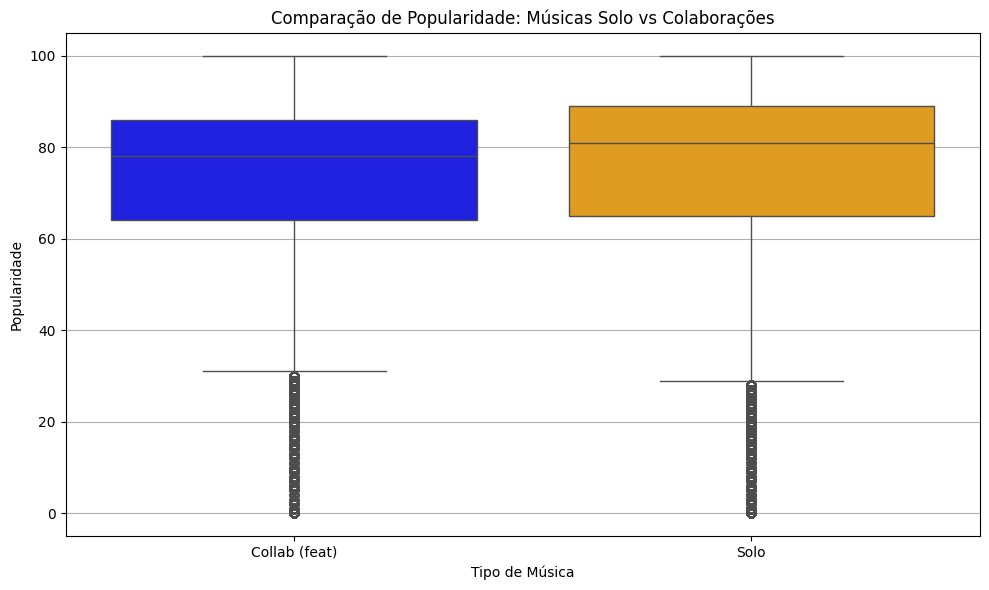


===== Estatísticas para: Collab (feat) =====
Média: 74.72
Mediana: 78.00
Moda: 83
Desvio Padrão: 15.15
Mínimo: 0
Máximo: 100
1º Quartil (Q1): 64.00
3º Quartil (Q3): 86.00
Número de músicas: 781099

===== Estatísticas para: Solo =====
Média: 76.65
Mediana: 81.00
Moda: 88
Desvio Padrão: 16.20
Mínimo: 0
Máximo: 100
1º Quartil (Q1): 65.00
3º Quartil (Q3): 89.00
Número de músicas: 1141186


In [44]:
# Lista de palavras que indicam colaboração
collab_keywords = ['feat.', 'ft.', 'featuring', 'Feat.', 'Ft.', 'Featuring']
colors = ["blue", "orange"]
def is_collab(row):
    artist_str = str(row['artists'])
    track_str = str(row['name'])

    # Verifica se há vírgula em 'artists' ou palavra-chave em 'name'
    has_multiple_artists = ',' in artist_str
    has_feat_in_title = any(keyword in track_str for keyword in collab_keywords)

    return has_multiple_artists or has_feat_in_title

# Aplica a função linha a linha
df['is_collab'] = df.apply(is_collab, axis=1)

# Mapeia para valores legíveis
df['collab_type'] = df['is_collab'].map({True: 'Collab (feat)', False: 'Solo'})

# Gráfico atualizado
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='collab_type', y='popularity', palette=colors)

plt.title('Comparação de Popularidade: Músicas Solo vs Colaborações')
plt.xlabel('Tipo de Música')
plt.ylabel('Popularidade')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Estatísticas de popularidade por tipo de música
for tipo in df['collab_type'].unique():
    subset = df[df['collab_type'] == tipo]['popularity']

    print(f"\n===== Estatísticas para: {tipo} =====")
    print(f"Média: {subset.mean():.2f}")
    print(f"Mediana: {subset.median():.2f}")
    print(f"Moda: {subset.mode().values[0] if not subset.mode().empty else 'N/A'}")
    print(f"Desvio Padrão: {subset.std():.2f}")
    print(f"Mínimo: {subset.min()}")
    print(f"Máximo: {subset.max()}")
    print(f"1º Quartil (Q1): {subset.quantile(0.25):.2f}")
    print(f"3º Quartil (Q3): {subset.quantile(0.75):.2f}")
    print(f"Número de músicas: {subset.count()}")

### **Popularidade pós falecimento de ex integrante**
Devido a morte de  Liam Payne, um dos ex integrantes da banda One Direction, surgiu a dúvida de se a popularidade aumentaria momentaneamente. Estamos analisando a coluna de artistas, popularidade e data nessa parte.

Média: 87.46
Máximo: 89.32
Mínimo: 84.97
Desvio padrão: 1.31
Assimetria (Skewness): -0.55
Curtose: -0.40


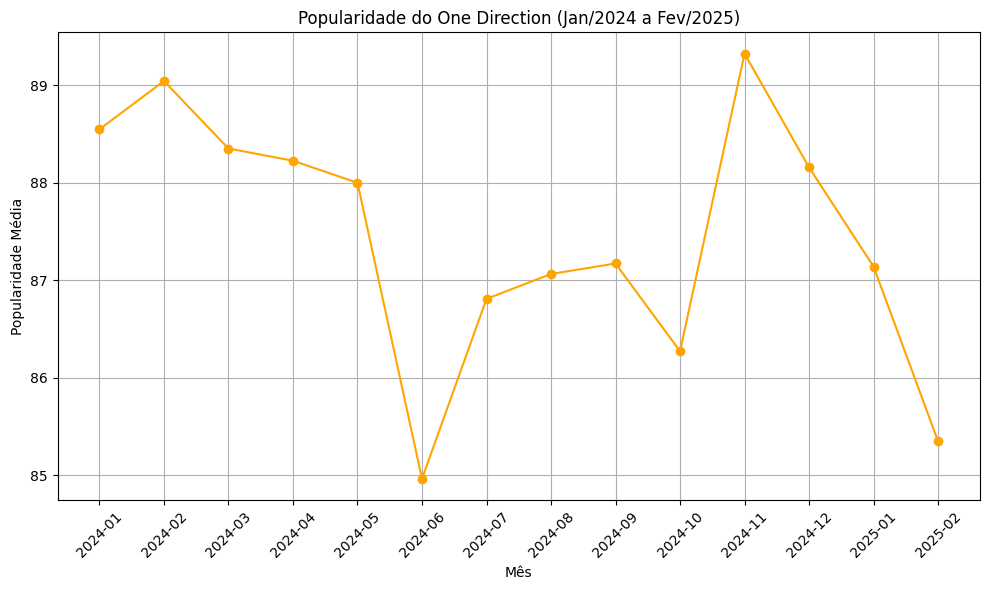

In [45]:
# Filtrar músicas do One Direction
one_direction_df = df[df['artists'].str.contains('One Direction', case=False, na=False)].copy()

# Converter datas e filtrar período de interesse
one_direction_df['snapshot_date'] = pd.to_datetime(one_direction_df['snapshot_date'], errors='coerce')
mask = (one_direction_df['snapshot_date'] >= '2024-01-01') & (one_direction_df['snapshot_date'] <= '2025-02-28')
one_direction_df = one_direction_df[mask]

# Criar coluna com mês e calcular média de popularidade por mês
one_direction_df['month'] = one_direction_df['snapshot_date'].dt.to_period('M')
monthly_popularity = one_direction_df.groupby('month')['popularity'].mean().reset_index()

# Estatísticas
media = monthly_popularity['popularity'].mean()
desvio_padrao = monthly_popularity['popularity'].std()
assimetria = monthly_popularity['popularity'].skew()
curtose = monthly_popularity['popularity'].kurt()
maximo = monthly_popularity['popularity'].max()
minimo = monthly_popularity['popularity'].min()

# Exibir estatísticas
print(f'Média: {media:.2f}')
print(f'Máximo: {maximo:.2f}')
print(f'Mínimo: {minimo:.2f}')
print(f'Desvio padrão: {desvio_padrao:.2f}')
print(f'Assimetria (Skewness): {assimetria:.2f}')
print(f'Curtose: {curtose:.2f}')

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(monthly_popularity['month'].astype(str), monthly_popularity['popularity'], marker='o', color='orange')
plt.title('Popularidade do One Direction (Jan/2024 a Fev/2025)')
plt.xlabel('Mês')
plt.ylabel('Popularidade Média')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Final Plots (Effective Data Visualization)**

In this section, you need to **enhance 3 multivariate visualizations** that were presented in the previous section of the report.
The goal is to enhance these visualizations so that they can be effectively presented to an audience unfamiliar with the dataset or with data analysis.
**Therefore, make sure that their size, colors, textures, and other visual elements are appropriate and convey the intended information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot;
2. Provide a description of the visualization, highlighting the key findings that can be drawn from it.


**Hint**: take a look at the checklist based on Evergreen’s work to ensure your visualizations meet the best practices for clarity and impact.

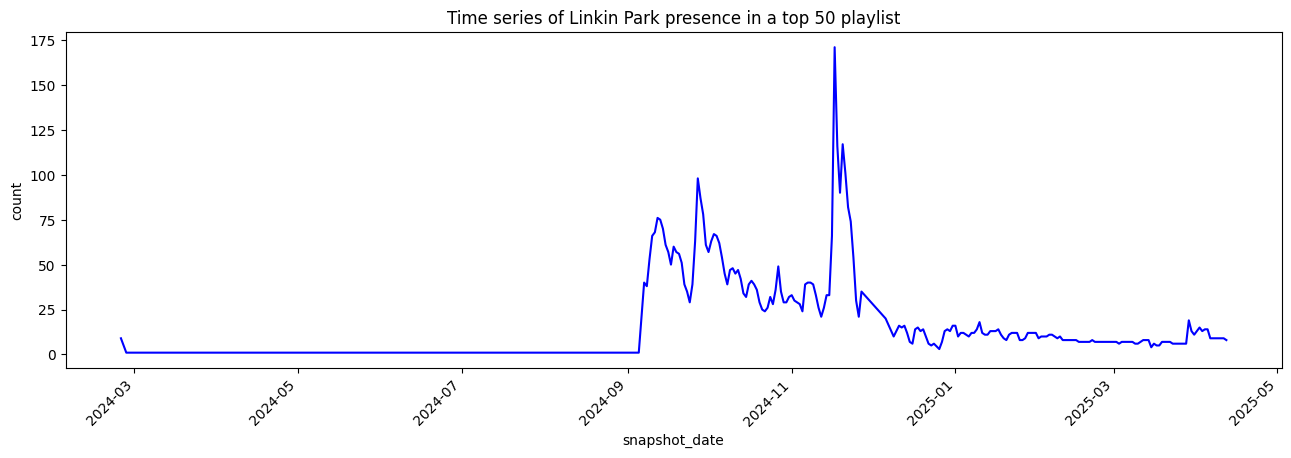

In [56]:
# data only of linkin park
lp = df[df['artists']=='Linkin Park']
lp['snapshot_date'].min()
# data only of linkin park
lp = df[df['artists']=='Linkin Park']
# transform the 'snapshot_date' to date
lp.loc[:,'snapshot_date'] = pd.to_datetime(lp['snapshot_date'],format="%Y-%m-%d")
# time series
songs_per_date = lp['snapshot_date'].value_counts()
df_songs_per_date = pd.DataFrame(songs_per_date).sort_values(by='snapshot_date')

colors = ["blue", "orange"]

# plot
sns.lineplot(data=df_songs_per_date, x='snapshot_date', y='count', color=colors[0])
plt.title('Time series of Linkin Park presence in a top 50 playlist')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(top=0.9, left=0.1, right=2, bottom=0.2)

Como podemos identificar pelo gráfico, no mês 09 houve um crescimento na quantidade de vezes que músicas da banda Linkin Park aparecem no top 50.

Estatísticas:

Distribuição:
 A distribuição possui assimetria positiva: a média é maior que a mediana e a moda. A cauda da direita é mais longa.
 A curtose é próxima de zero: distribuição mesocúrtica, semelhante à normal.
Média: 0.50
Desvio Padrão: 0.05
Assimetria (Skewness): 1.07
Curtose: -0.23


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\1074090206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=from_zero_songs, x='name', y='danceability', palette='coolwarm')


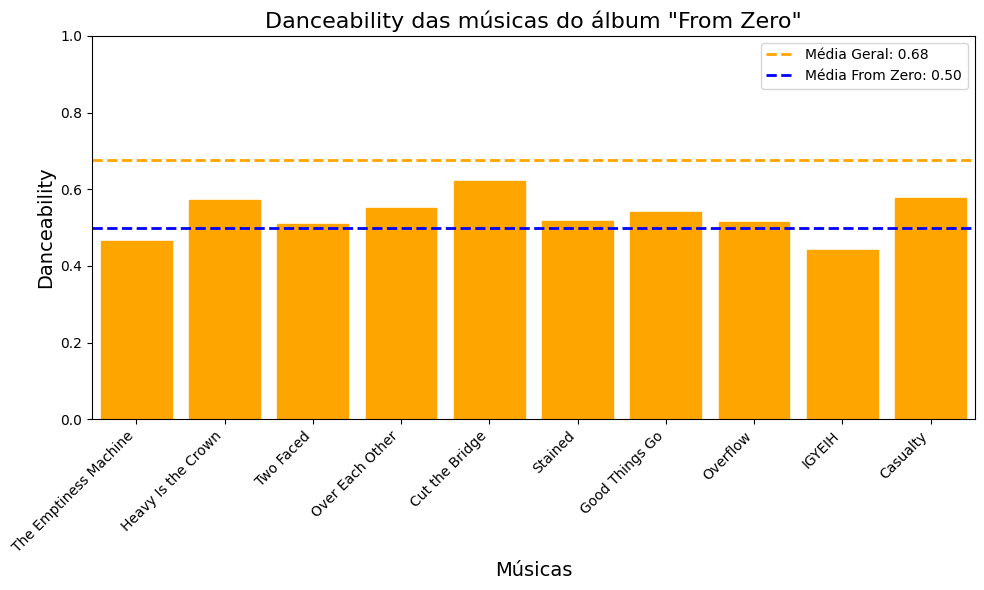

In [70]:
# Filtrar as músicas do álbum "From Zero"
from_zero_songs = df[df['album_name'] == 'From Zero']

plt.figure(figsize=(10, 6))
sns.barplot(data=from_zero_songs, x='name', y='danceability', palette='coolwarm')

# Estatísticas para 'danceability' das músicas do álbum "From Zero"
mean_danceability = from_zero_songs['danceability'].mean()
std_danceability = from_zero_songs['danceability'].std()
skewness_danceability = from_zero_songs['danceability'].skew()
kurtosis_danceability = from_zero_songs['danceability'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness_danceability, kurtosis_danceability)
print(f"Média: {mean_danceability:.2f}")
print(f"Desvio Padrão: {std_danceability:.2f}")
print(f"Assimetria (Skewness): {skewness_danceability:.2f}")
print(f"Curtose: {kurtosis_danceability:.2f}")

mean_danceability = from_zero_songs['danceability'].mean()
meanG_danceability = df['danceability'].mean()

colors = ["blue", "orange"]

plt.axhline(meanG_danceability, color=colors[1], linestyle='--', linewidth=2, label=f'Média Geral: {meanG_danceability:.2f}')
plt.axhline(mean_danceability, color=colors[0], linestyle='--', linewidth=2, label=f'Média From Zero: {mean_danceability:.2f}')

plt.title('Danceability das músicas do álbum "From Zero"', fontsize=16)
plt.xlabel('Músicas', fontsize=14)
plt.ylabel('Danceability', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend()

# Apply orange color to bars
for bar in plt.gca().patches:
    bar.set_color(colors[1])

plt.tight_layout()
plt.show()

Como podemos identificar pelo gráfico, as músicas do álbum "From Zero" da banda "Linkin Park" que aparecem no top 50 possuem um índice de danceability a baixo da média

Estatísticas:

Distribuição:
 A distribuição possui assimetria negativa: a média é menor que a mediana e a moda. A cauda da esquerda é mais longa.
 A distribuição é leptocúrtica: tem caudas mais pesadas e pico mais acentuado do que uma normal.
Média: 78.80
Desvio Padrão: 5.55
Assimetria (Skewness): -2.61
Curtose: 12.11


C:\Users\henri\AppData\Local\Temp\ipykernel_24384\1250662862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=from_zero_songs, x='name', y='popularity', palette=colors)
C:\Users\henri\AppData\Local\Temp\ipykernel_24384\1250662862.py:5: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=from_zero_songs, x='name', y='popularity', palette=colors)


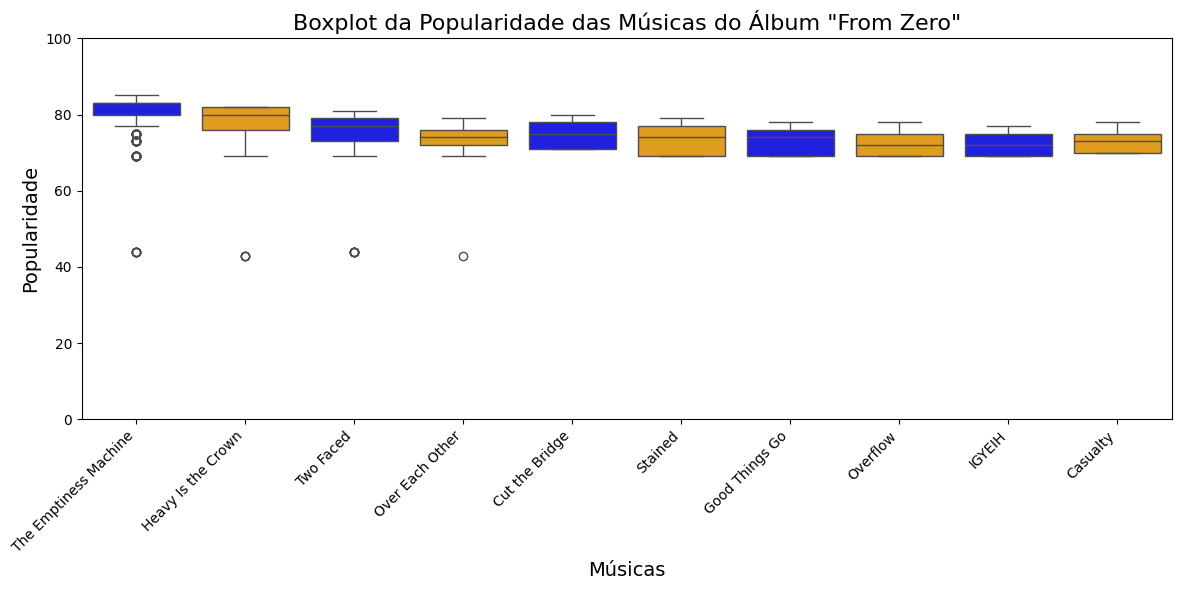

In [62]:
# Criar o gráfico de caixa para popularidade das músicas do álbum "From Zero"

colors = ["blue", "orange"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=from_zero_songs, x='name', y='popularity', palette=colors)

# Estatísticas para 'popularity' das músicas do álbum "From Zero"
mean_pop = from_zero_songs['popularity'].mean()
std_pop = from_zero_songs['popularity'].std()
skewness_pop = from_zero_songs['popularity'].skew()
kurtosis_pop = from_zero_songs['popularity'].kurt()

print("Estatísticas:")
interpretar_distribuicao(skewness_pop, kurtosis_pop)
print(f"Média: {mean_pop:.2f}")
print(f"Desvio Padrão: {std_pop:.2f}")
print(f"Assimetria (Skewness): {skewness_pop:.2f}")
print(f"Curtose: {kurtosis_pop:.2f}")

# Configurações do gráfico
plt.title('Boxplot da Popularidade das Músicas do Álbum "From Zero"', fontsize=16)
plt.xlabel('Músicas', fontsize=14)
plt.ylabel('Popularidade', fontsize=14)
plt.ylim(0, 100)  # Define os limites do eixo y de 0 a 100
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Digest**

In this section you should write down the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2,500 characters (excluding spaces).

```
Add your text here.
```

# **Machine Learning (**post checkpoint!**)**

In this section, you must create at least **3 machine learning models** for the task at hand. Depending on the problem's nature, you must select from classification, regression, or clustering models.
It is also important that you:
* Select **an appropriate validation protocol**, providing a rationale for why it is appropriate for this specific task;
* Choose **a suitable set of evaluation metrics**, providing an explanation for each and describing how it contributes to evaluating the model's performance in the context of this specific task.

In [ ]:
# use as many cells as needed

# **Final Steps (Submission)**


1. Save this report as a Jupyter Notebook (`.ipynb`);
2. Export a copy of the report as a PDF file (`.pdf`);
3. Copy the dataset;
4. Compress all the files (the Jupyter Notebook, PDF, and dataset) into a single ZIP archive (`<your_team_name>.zip`);
5. Upload the ZIP file to AVA.